## $Linear-Regression$

The mathematical equation of a line:
# $y = mx + c$

- Please plot this line using matplotlib

Imagine we have data related to `salary` vs `years_of_experience`
- let's use:
    - x = Independent Variable (years_of_experience)
    - y = Dependent Variable (salary)

In [112]:
import matplotlib.pyplot as plt
import numpy as np

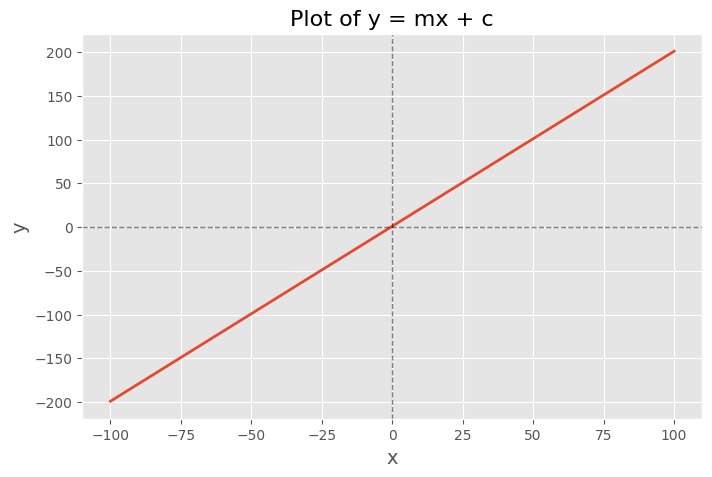

In [113]:
m = 2
c = 1
 
x = np.linspace(-100, 100, 100)
y = m * x + c
 
plt.plot(x, y)


plt.axhline(0, color= 'black' , linestyle='--', linewidth=1, alpha = 0.5) # horizontal line
plt.axvline(0, color='black', linestyle='--', linewidth=1, alpha = 0.5) # Vertical line

plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of y = mx + c")
plt.show()

- In machine learning, we see it like this:

$$\hat{y} = \beta_0 + \beta_1x_1$$

$$y = mx + c$$

$$\hat{y} = Ax + B$$

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

Exercise:
- Use the House price prediction dataset 
- use two features
- take a single feature:  (AveRooms - AveBedrms)* 144 = **AveArea** (average area in sq ft keeping 12 x 12 as average room dimensions)
- use the **MedHouseVal**
- Implement linear regression on this

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score


In [115]:
# data import acquisition
cali = fetch_california_housing()

X_df = pd.DataFrame(cali.data, columns = cali.feature_names)

- Linear Regression, using:
    - x = Area feature ---- Feature Creation
    - y = House Price
    - 
    - create a model that predicts the house price

In [116]:
X_df.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22


In [117]:
# feature creation
# (rooms - bedrooms) * 144
X_df['AveArea'] = (X_df.AveRooms - X_df.AveBedrms)*144

# feature selection
X = pd.DataFrame(X_df.AveArea)

X = pd.DataFrame(X_df.MedInc)
y = cali.target

# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [118]:
# modeling training and testing
model = LinearRegression()

# train the model
model.fit(X_train, y_train)

# predictions on it
predictions = model.predict(X_test)

# test/ evaluate
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions) ** 0.5

r2 = r2_score(y_test, predictions)

In [ ]:
# print the results
print("============== Linear Regressor Scores ===========")
print(f"Mean Squared Error: ------------> {mse:.2f}")
print(f"Root Mean Absolute Error: ------------> {rmse:.2f}")
print(f"R2 Score: ------------> {r2:.2f}")

============== Linear Regressor Scores ===========
Mean Squared Error: ------------> 0.71
Root Mean Absolute Error: ------------> 0.84
R2 Error: ------------> 0.46


$R^2$ = 1 - $SS_{residual}$ / $SS_{total}$

- range: -infinity - 0 
- $R^2$ is closer to 1, your model is explaing the variance well, and is a good model
- 
- MAE, MSE ---> more means greater error
- RMSE ------> comes out in the same units as y 

In [120]:
beta1 = model.coef_ # slope
# small coefficient, will make our line, parallel to y

beta0 = model.intercept_

print(beta0,beta1)

0.44459729169078677 [0.41933849]


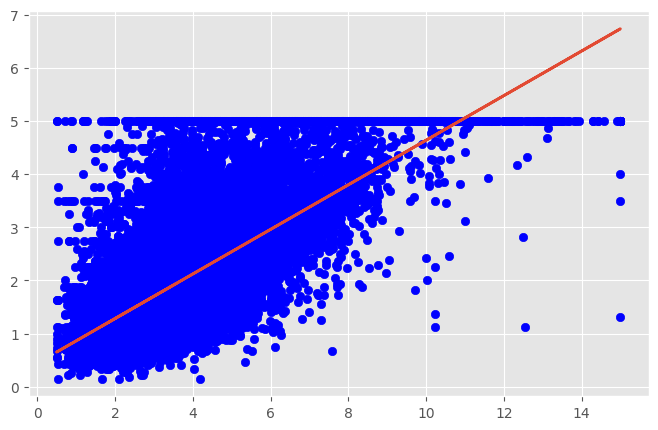

In [121]:
# regression is based on a straight line of fit, let's plot it

plt.scatter(X,y, color = 'b')
plt.plot(X_test, predictions )

plt.show()

## Steps we use to improve performance of models

#### **Feature Engineering**

[Learn More](https://www.geeksforgeeks.org/machine-learning/what-is-feature-engineering/)

1. Feature Selection:
    - Choose the best features from a dataset
    - Based on statistical measures like correlation
2. **Feature Transformation**:
    - Adjusting features to improve model learning
    - Standardization and normalization
    - Scaling features

3. **Feature Creation**:
    - Generating new features from existing data using domain knowledge or data patterns.
4. Feature Extraction:
    - Reducing dimensionality or extracting meaningful information
    

#### **Choose a different model - Or use Ensemble Methods**

- Linear Regression - 
- 
- **Ensemble Models** - combine multiple models to improve predictive performance
[Learn More](https://www.geeksforgeeks.org/machine-learning/a-comprehensive-guide-to-ensemble-learning/)
    
    ![](https://i-blog.csdnimg.cn/direct/d82d1eab331b4830964eab8f6fcc0862.png)
    
    - **Ensemble Learning**: Using multiple models on the same data, to get good outputs
    - Bagging:
        - take multiple weak learners, train them on separate parts of dataset, and when making predictions, aggregate their output
        - Their results are then combined—usually by averaging (for regression) or voting (for classification)
    ![](https://editor.analyticsvidhya.com/uploads/31781bootstrap-aggregation-process.png)
    - Boosting:
        - 
        - The final prediction is a weighted combination of all models

    ![](https://img-blog.csdnimg.cn/img_convert/aab415d5028e4a5edc75225d673cc7ce.gif)
    
        - 

### **Hyperparameter Tuning**

- Change the parameters of models, untill you get the best output
- 